<a href="https://colab.research.google.com/github/anmolkhurana490/Indian-Celebrity-Face-Classification/blob/main/Celebrity_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
celebrity_data=pd.read_csv('/content/drive/MyDrive/Indian Celebrity Prediction/datasets/celebrity_face_data.csv')

In [ ]:
celebrity_data

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,celebrity_name
0,179.0,199.0,176.0,179.0,199.0,176.0,178.0,198.0,175.0,179.0,...,23.0,26.0,11.0,18.0,28.0,60.0,249.0,3.0,17.0,Alia Bhatt
1,10.0,13.0,17.0,10.0,12.0,17.0,12.0,15.0,20.0,16.0,...,0.0,219.0,2.0,0.0,0.0,100.0,254.0,3.0,40.0,Alia Bhatt
2,62.0,129.0,152.0,115.0,146.0,151.0,202.0,209.0,207.0,168.0,...,150.0,68.0,197.0,251.0,244.0,245.0,253.0,254.0,233.0,Alia Bhatt
3,80.0,69.0,79.0,95.0,82.0,90.0,66.0,53.0,61.0,70.0,...,17.0,246.0,225.0,16.0,248.0,242.0,18.0,17.0,215.0,Alia Bhatt
4,17.0,17.0,17.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,153.0,4.0,19.0,31.0,2.0,1.0,249.0,2.0,24.0,Alia Bhatt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,63.0,45.0,52.0,91.0,72.0,81.0,75.0,55.0,67.0,87.0,...,2.0,5.0,4.0,0.0,254.0,253.0,255.0,147.0,1.0,Shilpa Shetty
728,243.0,246.0,237.0,239.0,241.0,235.0,241.0,241.0,240.0,239.0,...,113.0,109.0,105.0,110.0,126.0,122.0,150.0,243.0,20.0,Shilpa Shetty
729,35.0,70.0,134.0,16.0,41.0,102.0,24.0,39.0,87.0,17.0,...,235.0,45.0,9.0,228.0,45.0,120.0,105.0,232.0,43.0,Shilpa Shetty
730,16.0,29.0,25.0,1.0,23.0,18.0,96.0,132.0,125.0,145.0,...,232.0,243.0,24.0,8.0,251.0,242.0,143.0,7.0,2.0,Shilpa Shetty


In [ ]:
xdata=celebrity_data.drop('celebrity_name', axis=1)
ydata=celebrity_data.celebrity_name

In [ ]:
xdata.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,179.0,199.0,176.0,179.0,199.0,176.0,178.0,198.0,175.0,179.0,...,102.0,23.0,26.0,11.0,18.0,28.0,60.0,249.0,3.0,17.0
1,10.0,13.0,17.0,10.0,12.0,17.0,12.0,15.0,20.0,16.0,...,189.0,0.0,219.0,2.0,0.0,0.0,100.0,254.0,3.0,40.0
2,62.0,129.0,152.0,115.0,146.0,151.0,202.0,209.0,207.0,168.0,...,208.0,150.0,68.0,197.0,251.0,244.0,245.0,253.0,254.0,233.0
3,80.0,69.0,79.0,95.0,82.0,90.0,66.0,53.0,61.0,70.0,...,9.0,17.0,246.0,225.0,16.0,248.0,242.0,18.0,17.0,215.0
4,17.0,17.0,17.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,253.0,153.0,4.0,19.0,31.0,2.0,1.0,249.0,2.0,24.0


In [ ]:
ydata.value_counts()

celebrity_name
Alia Bhatt          90
Shilpa Shetty       90
Salman Khan         83
Rajkumar Rao        82
Hema Malini         78
Shah Rukh Khan      76
Deepika Padukone    71
Anupam Kher         60
Amitabh Bachchan    54
Sachin Tendulkar    48
Name: count, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(xdata, ydata, test_size=0.25, random_state=5)

In [ ]:
ytest.value_counts()

celebrity_name
Hema Malini         27
Shilpa Shetty       23
Salman Khan         23
Alia Bhatt          19
Shah Rukh Khan      18
Rajkumar Rao        18
Amitabh Bachchan    15
Deepika Padukone    15
Sachin Tendulkar    13
Anupam Kher         12
Name: count, dtype: int64

In [ ]:
pipe=Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=1))])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=1))])

In [ ]:
score=pipe.score(xtrain, ytrain)
score

0.9927140255009107

In [ ]:
score=pipe.score(xtest, ytest)
score

0.639344262295082

In [ ]:
report=classification_report(ytest, pipe.predict(xtest))
print(report)

                  precision    recall  f1-score   support

      Alia Bhatt       0.45      0.68      0.54        19
Amitabh Bachchan       0.68      0.87      0.76        15
     Anupam Kher       0.80      0.67      0.73        12
Deepika Padukone       0.48      0.80      0.60        15
     Hema Malini       0.89      0.59      0.71        27
    Rajkumar Rao       0.75      0.67      0.71        18
Sachin Tendulkar       1.00      0.23      0.38        13
     Salman Khan       0.48      0.61      0.54        23
  Shah Rukh Khan       0.62      0.44      0.52        18
   Shilpa Shetty       0.86      0.78      0.82        23

        accuracy                           0.64       183
       macro avg       0.70      0.63      0.63       183
    weighted avg       0.70      0.64      0.64       183



In [ ]:
model_params={
    'svc': {
        'model': SVC(C=1),
        'params': {
            'svc__kernel': ['rbf', 'linear'],
        }
    },
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10,30,40]
        }
    },
    'logistic': {
        'model': LogisticRegression(),
        'params': {
            #'logisticregression__solver': ['lbfg']
        }
    }
}

In [ ]:
scores=[]
best_estimators={}
for name,mp in model_params.items():
    print(name, "model")
    pipe=make_pipeline(StandardScaler(), mp['model'])
    model=GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    model.fit(xtrain, ytrain)
    scores.append({
        'model_name': name,
        'best_score': model.best_score_,
        'best_params': model.best_params_
    })
    best_estimators[name]=model.best_estimator_

In [ ]:
pd.DataFrame(scores)

,model_name,best_score,best_params
0,svc,0.712432,{'svc__kernel': 'linear'}
1,rfc,0.518952,{'randomforestclassifier__n_estimators': 40}
2,logistic,0.717838,{}


In [ ]:
best_estimators['svc'].score(xtest, ytest)

0.8743169398907104

In [ ]:
best_estimators['rfc'].score(xtest, ytest)

0.5567567567567567

In [ ]:
best_estimators['logistic'].score(xtest, ytest)

0.7135135135135136

In [ ]:
pipe=Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])
pipe.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
pipe.score(xtrain, ytrain)

1.0

In [ ]:
pipe.score(xtest, ytest)

0.7540983606557377

In [ ]:
pipe=best_estimators['logistic']

In [ ]:
cm=confusion_matrix(ytest, pipe.predict(xtest))
cm

Text(50.722222222222214, 0.5, 'Actual celebrities')

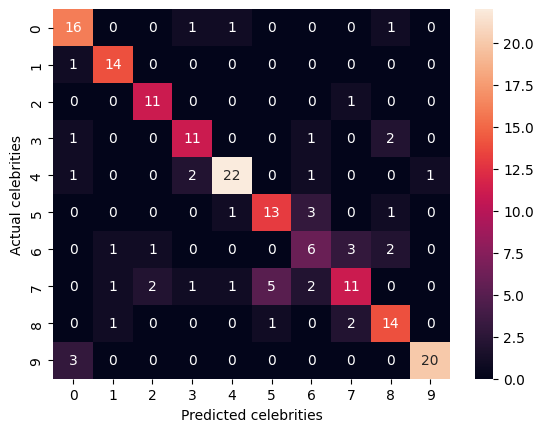

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted celebrities')
plt.ylabel('Actual celebrities')

In [ ]:
celebrities=ydata.unique()
celebrities

array(['Alia Bhatt', 'Amitabh Bachchan', 'Anupam Kher',
       'Deepika Padukone', 'Hema Malini', 'Rajkumar Rao',
       'Sachin Tendulkar', 'Salman Khan', 'Shah Rukh Khan',
       'Shilpa Shetty'], dtype=object)

In [ ]:
def wrong_pred(actual, pred):
  wrong=[]
  for (_,data),celeb in zip(xtest.iterrows(), ytest):
    if celeb==celebrities[actual] and pipe.predict([data])==celebrities[pred]:
      wrong.append(data)
  return wrong

In [ ]:
wrong=wrong_pred(7,5)
len(wrong)

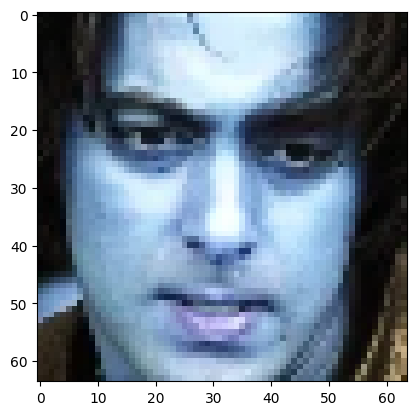

In [ ]:
image=np.array(wrong[4])[:-4096].reshape(64,64,-1)
plt.imshow(image/255)

In [ ]:
import pickle
with open("/content/drive/MyDrive/Indian Celebrity Prediction/model/celebrity_prediction_model.pickle", "wb") as file:
    pickle.dump(pipe, file)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import pywt
import pickle
import os

In [ ]:
haar_cascade=cv2.CascadeClassifier('/usr/local/lib/python3.10/dist-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/usr/local/lib/python3.10/dist-packages/cv2/data/haarcascade_eye.xml')

In [ ]:
with open("/content/drive/MyDrive/Indian Celebrity Prediction/model/celebrity_prediction_model.pickle", "rb") as file:
 model=pickle.load(file)

In [ ]:
def get_cropped_faces_with_2_eyes(image_path):
 original_image=cv2.imread(image_path)
 gray_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
 faces=haar_cascade.detectMultiScale(gray_image, 1.2, 5)
 faces_list=[]
 for x,y,w,h in faces:
  face_gray=gray_image[y:y+h, x:x+w]
  eyes=eye_cascade.detectMultiScale(face_gray)
  if len(eyes)>=2:
   face_img=original_image[y:y+h, x:x+w]
   faces_list.append(face_img)
 return faces_list

In [ ]:
def image_wavelet_transform(image, mode='haar', level=1):
 image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 imageArray=np.float32(image_gray)/255
 coeff=pywt.wavedec2(imageArray, mode, level=level)
 coeff[0]*=0
 imageArray_wt=pywt.waverec2(coeff, mode)
 imageArray_wt=np.uint8(imageArray_wt*255)
 return imageArray_wt

In [ ]:
def preprocess_predict_image(image):
 faces=get_cropped_faces_with_2_eyes(image)
 faces_name=[]
 for face_img in faces:
  img_scaled=cv2.resize(face_img, (64, 64))
  img_wt=image_wavelet_transform(face_img, mode='db1', level=6)
  img_wt_scaled=cv2.resize(img_wt, (64, 64))
  combined_img=np.vstack((img_scaled.reshape(-1,1), img_wt_scaled.reshape(-1,1)))
  combined_img=combined_img.reshape(1,-1)
  combined_img=np.float32(combined_img)

  name=model.predict(combined_img)[0]
  faces_name.append(name)

 return pd.DataFrame({"face_img": faces, "face_name": faces_name})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


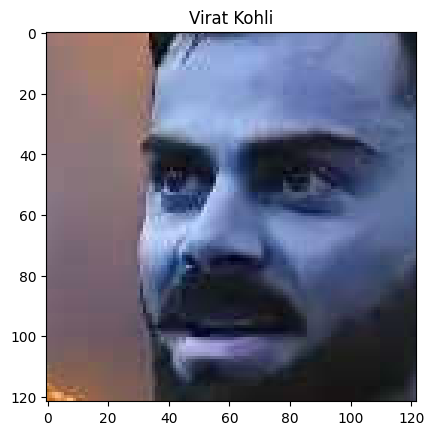

In [ ]:
if __name__=="__main__":
 path="/content/drive/MyDrive/Indian Celebrity Prediction/datasets/images/test images"
 image=path+'/'+os.listdir(path)[0]
 pred_celebrities=preprocess_predict_image(image)
 if pred_celebrities.empty:
    print("no face found")
for i,face in pred_celebrities.iterrows():
    plt.subplot(len(pred_celebrities),1,i+1)
    plt.imshow(face["face_img"])
    plt.title(face["face_name"])
plt.show()